In [1]:
# https://direct.hi.co.kr/service.do?m=e429f6a022
# 현대해상 다이렉트 자동차보험 할인특약 웹 크롤링


import requests
from bs4 import BeautifulSoup
import csv

# 타겟 URL
url = "https://direct.hi.co.kr/service.do?m=e429f6a022"

# 페이지 요청
response = requests.get(url)
response.encoding = "utf-8"
soup = BeautifulSoup(response.text, 'html.parser')

# li 태그 모두 찾기
items = soup.find_all("li")

# 결과 저장용 리스트
results = []

# li 내에 p.txt (제목) + span (내용) 추출
for item in items:
    title_tag = item.find("p", class_="txt")
    if not title_tag:
        continue
    title = title_tag.get_text(strip=True)

    # 해당 p 안의 span (또는 후속 span들)에서 텍스트 추출
    spans = item.find_all("span")
    contents = [span.get_text(strip=True) for span in spans if span.get_text(strip=True)]

    # 여러 줄 내용이면 합치기
    content = " / ".join(contents)

    results.append([title, content])

# CSV 저장
with open("hi_direct_discounts.csv", "w", newline="", encoding="utf-8-sig") as f:
    writer = csv.writer(f)
    writer.writerow(["제목", "내용"])
    writer.writerows(results)

print("CSV 파일로 저장 완료: hi_direct_discounts.csv")


CSV 파일로 저장 완료: hi_direct_discounts.csv


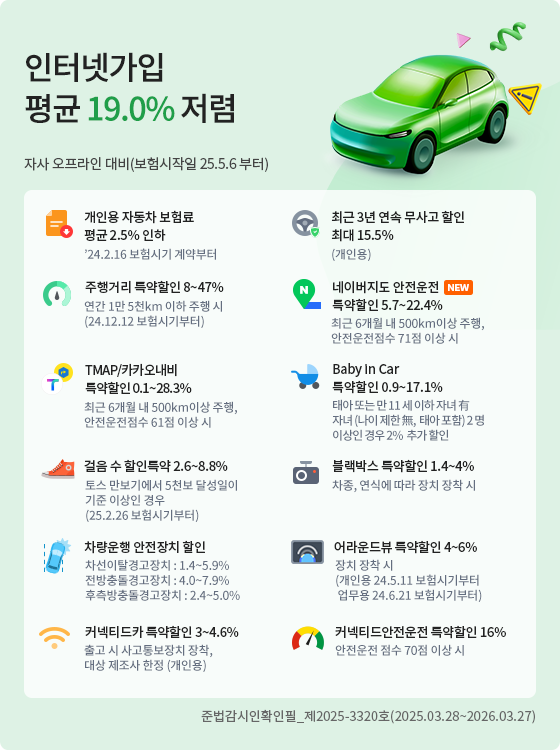

In [3]:
# db다이렉트 자동차보험 할인 특약
# https://www.directdb.co.kr/at/prd/atarc/step1/formStepPreView.do?src=adwords&kw=0BD8AF&partner_code=C457&keyword=KGM00065&utm_source=google_pc&utm_medium=cpc&utm_campaign=nhnad&utm_term=DB%EC%86%90%ED%95%B4%EB%B3%B4%ED%97%98%EB%8B%A4%EC%9D%B4%EB%A0%89%ED%8A%B8&nbsrc=adwords_g&nbkw=db%EC%86%90%ED%95%B4%EB%B3%B4%ED%97%98%EB%8B%A4%EC%9D%B4%EB%A0%89%ED%8A%B8&gad_source=1&gclid=CjwKCAjwzMi_BhACEiwAX4YZUAp4yk7mMLWQX490Kwg-jUPVaNlDkzsFlftS2Fca3VHfSZyx1maTRhoC3-gQAvD_BwE
# 이미지로 되어있어서 어떻게 해야할지,,,,

from PIL import Image
import requests

# 이미지 다운로드
db_img_url = "https://www.directdb.co.kr/cms/at/prd/atarc/step1/740_image_1.png"
db_img_path = "db_할인특약.png"

response = requests.get(db_img_url)
with open(db_img_path, "wb") as f:
    f.write(response.content)



# 이미지 열기
db_img = Image.open(db_img_path)

display(db_img)

In [10]:
# db손해보험 크롤링 (아직 해결 안 됨)

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time
import csv

# 크롬 드라이버 설정
options = Options()
options.add_argument("--headless")  # 창 안 띄우기 (원하면 제거)
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome(options=options)

# 타겟 URL
url = "https://www.directdb.co.kr/at/prd/atarc/step1/formStepPreView.do"
driver.get(url)

time.sleep(3)  # 페이지 로딩 대기 (필요시 조절)

# 결과 저장용 리스트
results = []

# txt 블록들을 찾음
# txt_blocks = driver.find_elements(By.CSS_SELECTOR, ".tab-cont.active .sale-infomation .top-box .txt")

txt_blocks = driver.find_elements(By.CSS_SELECTOR, ".product-inner .product-detail-s .product .txt")


for block in txt_blocks:
    try:
        title = block.find_element(By.CSS_SELECTOR, "strong.sub-tit").text.strip()
    except:
        title = ''
    try:
        content = block.find_element(By.CSS_SELECTOR, "h2.tit").text.strip()
    except:
        content = ''

    if title or content:
        results.append((title, content))

# CSV로 저장
with open("db_discount_specials.csv", "w", newline="", encoding="utf-8-sig") as f:
    writer = csv.writer(f)
    writer.writerow(["제목", "내용"])
    writer.writerows(results)

driver.quit()
print("크롤링 완료. CSV로 저장됨.")


크롤링 완료. CSV로 저장됨.


이미지 저장 완료


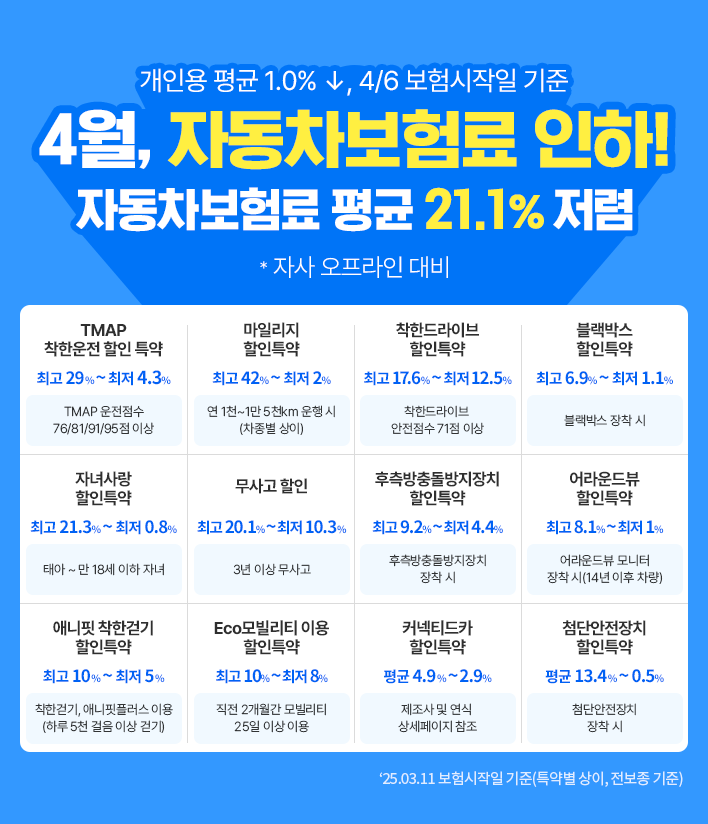

In [7]:
import requests

# 이미지 URL
img_url = 'https://direct.samsungfire.com/ria/dlpo/car/default-pc-indi-A.png'

# 파일 요청
response = requests.get(img_url)

# 저장
if response.status_code == 200:
    with open('삼성화재_자동차보험_할인_이미지.png', 'wb') as f:
        f.write(response.content)
    print("이미지 저장 완료")



# 저장된 이미지 파일 경로
img_path = '삼성화재_자동차보험_할인_이미지.png'

# 이미지 열기
img = Image.open(img_path)

display(img)

In [8]:
# 삼성화재 할인특약(해결 안 됨)


from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import csv
import time

# 크롬 옵션 설정
options = Options()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# 드라이버 실행
driver = webdriver.Chrome(options=options)

# 삼성화재 웹사이트 접속
url = 'https://direct.samsungfire.com/ria/pc/product/car/?state=Front&ver=15'
driver.get(url)
time.sleep(5)

# <select id="discountQuickMenu"> 안의 <option> 요소들 가져오기
options_elements = driver.find_elements(By.CSS_SELECTOR, 'select#discountQuickMenu option')

# value 속성값 추출
values = []
for option in options_elements:
    val = option.get_attribute("value")
    if val and val != "0":  # '전체' 항목(value=0)은 제외
        values.append(val)

driver.quit()

# CSV로 저장
with open('할인특약_option_values.csv', 'w', newline='', encoding='utf-8-sig') as f:
    writer = csv.writer(f)
    writer.writerow(['번호', '옵션값 (value)'])
    for i, val in enumerate(values, 1):
        writer.writerow([i, val])

print("'할인특약_option_values.csv' 저장 완료!")


✅ '할인특약_option_values.csv' 저장 완료!


In [2]:
# axa 할인특약

import requests
from bs4 import BeautifulSoup
import csv

# URL
url = "https://www.axa.co.kr/AsianPlatformInternet/html/axacms/shai/auto/info/index.html"

# 요청
response = requests.get(url)
response.encoding = 'euc-kr'
soup = BeautifulSoup(response.text, 'html.parser')

# 결과 저장 리스트
specials = []

# <li> 하나씩 돌면서 정보 수집
li_tags = soup.find_all("li")

for li in li_tags:
    h2 = li.find("h2")  # 특약 이름
    h1 = li.find("h1")  # 할인율
    p = li.find("p")    # 설명

    if h2 and "특약" in h2.text:
        name = h2.get_text(strip=True)
        percent = h1.get_text(strip=True).replace("평균", "").strip() if h1 else ""

        # 설명 텍스트 정리 (줄바꿈 포함해서)
        desc = ""
        if p:
            desc = p.get_text(separator="\n", strip=True)

        specials.append([name, percent, desc])

# CSV 저장
with open("axa_specials_full.csv", "w", newline="", encoding="utf-8-sig") as f:
    writer = csv.writer(f)
    writer.writerow(["특약 이름", "할인율", "설명"])
    writer.writerows(specials)


print("크롤링 완료")



크롤링 완료


In [ ]:
# 캐롯 (아직 해결 안 됨)

# ✅ 1단계: 크롬 및 크롬드라이버 설치
!apt-get update
!apt-get install -y chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

# ✅ 2단계: 크롤링 코드 (Colab 환경에 맞게 수정됨)
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import time
import csv

options = Options()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.binary_location = '/usr/bin/chromium-browser'

driver = webdriver.Chrome(service=Service("/usr/bin/chromedriver"), options=options)
url = "https://www.carrotins.com/desktop/calculation/car/personal/"
driver.get(url)
time.sleep(5)

elements = driver.find_elements(By.CSS_SELECTOR, "li.add-box-item")

data = []
for elem in elements:
    try:
        name = elem.find_element(By.CSS_SELECTOR, "div.spacing").text.strip()
        desc = elem.find_element(By.CSS_SELECTOR, "p.desc").text.strip()
        discount = elem.find_element(By.CSS_SELECTOR, "p.percent").text.strip()
        data.append([name, desc, discount])
    except Exception as e:
        print("❌ 오류:", e)

with open("carrot_discount_specials.csv", "w", newline="", encoding="utf-8-sig") as f:
    writer = csv.writer(f)
    writer.writerow(["특약 이름", "설명", "할인율"])
    writer.writerows(data)

driver.quit()
print("carrot_discount_specials.csv 저장 완료")


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 257 kB in 13s (19.4 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package li

WebDriverException: Message: Service /usr/bin/chromedriver unexpectedly exited. Status code was: 1
